In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

## 1. 데이터 생성

### `make_blobs` 가 받는 argument 각각의 의미를 알아보세요.

In [2]:
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

n_samples: 생성하는 데이터 포인트의 총수

centers: 생성할 클러스의 개수

cluster_std: 각 클러스터 내 데이터 포인트의 표준편차

random_state: 난수 생성 시드

## 2. K-means 클러스터링
K-means 알고리즘을 사용하여 데이터셋을 4개의 클러스터로 나누어 봅시다.

In [3]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

### 클러스터가 더 퍼져 있으면 K-means 결과는 어떻게 달라질까요? 결과를 해석해보세요.

In [4]:
X_varied, y_varied = make_blobs(n_samples=300, centers=4, cluster_std=2.0, random_state=42)
kmeans_varied = KMeans(n_clusters=4, random_state=42)
kmeans_varied_labels = kmeans_varied.fit_predict(X_varied)

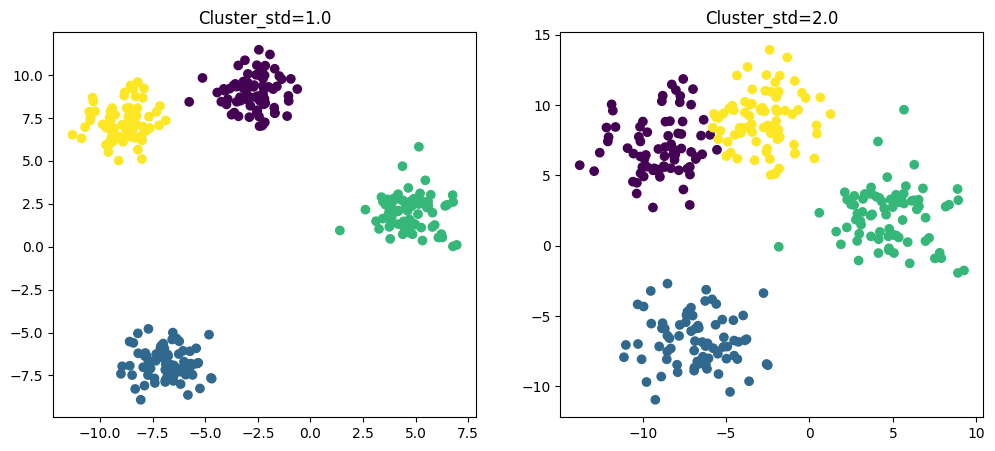

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Cluster_std=1.0')
plt.subplot(1, 2, 2)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=kmeans_varied_labels, cmap='viridis')
plt.title('Cluster_std=2.0')
plt.show()

클러스터가 더 퍼져 있을 때 K-means 알고리즘의 성능이 낮아진다. 다른 클러스터 간의 경계의 데이터 포인트들이 잘못 분류될 가능성이 있어 보인다.

## 3. 계층적 클러스터링
계층적 클러스터링을 사용하여 데이터를 4개의 클러스터로 그룹화해봅시다

In [6]:
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X)

## 실습 2: Hierarchical Clustering linkage 방법 비교
### 서로 다른 linkage 방법(single, complete, average)에 따라 클러스터링 결과가 어떻게 달라지나요?

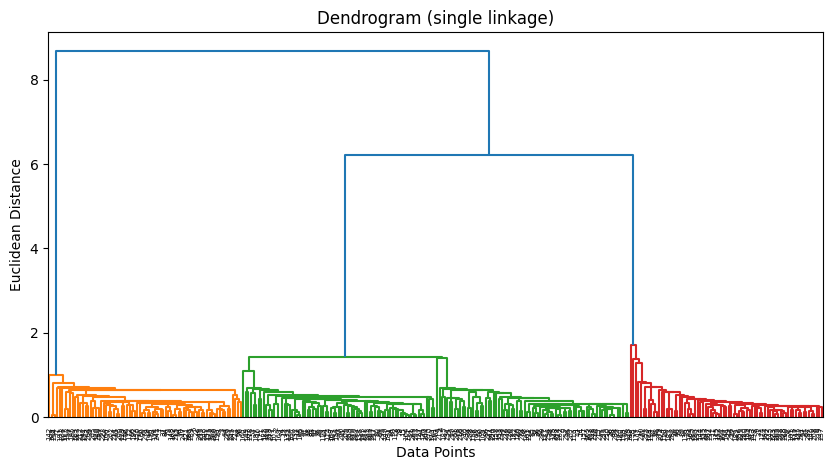

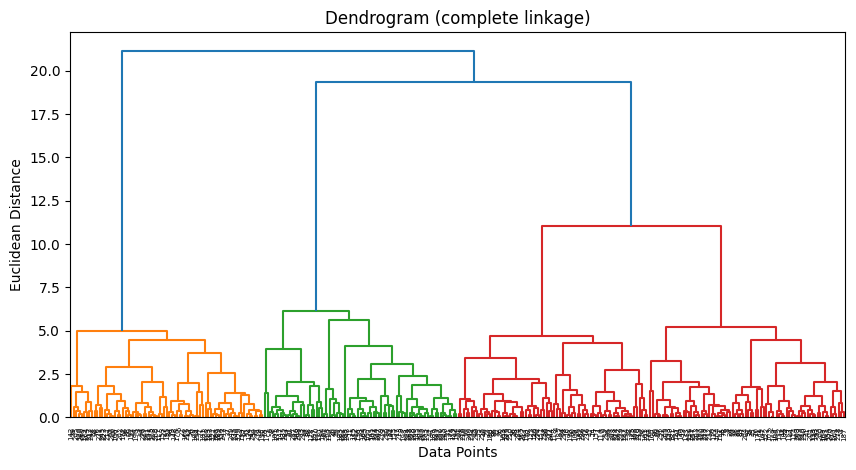

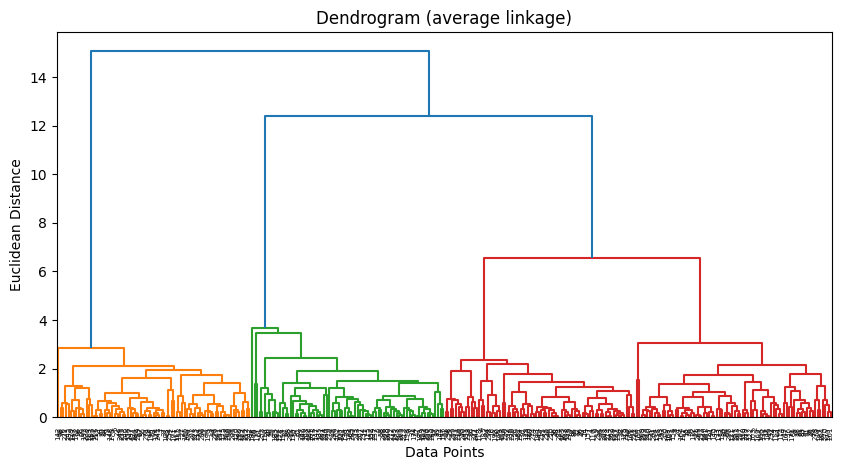

In [7]:
for method in ['single', 'complete', 'average']:
    plt.figure(figsize=(10, 5))
    Z = linkage(X, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distance')
    plt.show()

Single linkage는 가장 가까운 두 점을 기준으로 군집을 합치므로 연결된(chain-like) 구조가 형성되어 데이터의 연속적 특성을 잘 포착한다. 다만 chaining 현상으로 인해 군집 경계가 불분명해질 수 있다.

Complete linkage는 두 군집의 모든 점 중 가장 먼 거리를 기준으로 군집을 합치고, 응집력 있는 군집을 형성하지만 이상치에 민감하여 군집 간 분리가 지나치게 엄격할 수 있다

Average linkage는 모든 점 간의 평균 거리를 이용하여 군집을 합치므로 두 극단 사이의 타협안을 제공하며 일반적으로 균형 잡힌 군집 결과를 도출한다.

## 4. GMM (Gaussian Mixture Model)
GMM을 사용하여 데이터를 4개의 클러스터로 분류해봅시다

In [8]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X)

### GMM에서 가우시안 개수를 조정하면 클러스터링 결과는 어떻게 달라질까요?

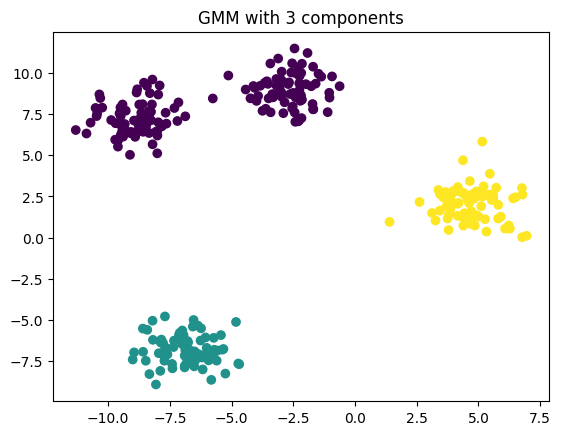

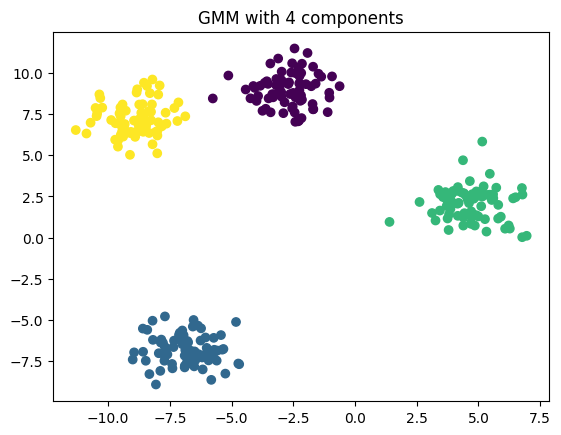

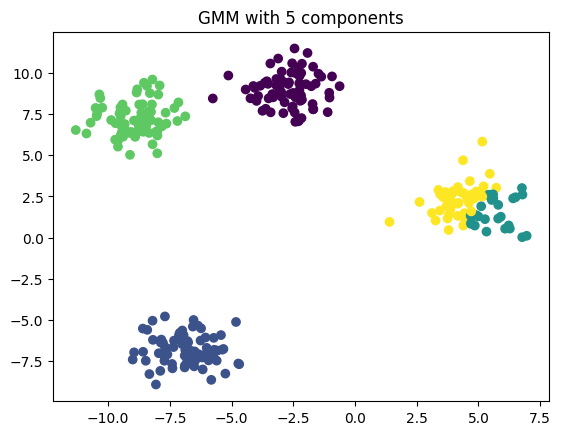

In [9]:
for n in [3, 4, 5]:
    gmm_test = GaussianMixture(n_components=n, random_state=42)
    gmm_test_labels = gmm_test.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=gmm_test_labels, cmap='viridis')
    plt.title(f'GMM with {n} components')
    plt.show()

1. 과소 적합: n_componetns가 실제 클러스터 수보다 적으면 모델이 단순화되어 클러스터들 간의 병합이 발생한다. 이에 데이터의 군집화가 제대로 이루어지지 않는다.

2. 최적: 이상적인 n_components 값은 일반적으로 데이터의 실제 클러스터 수이다. GMM이 과적합, 과소적합 없이 적절히 기본적인 구조를 파악한다.

3. 과적합: n_components가 너무 많다. 실제 클러스터보다 더 많으면 모델이 복잡해지고 이에 노이즈에 따라 인위적인 군집이 발생할 수 있다.

위의 산포도는 위의 설명 순서대로의 예시라고 할 수 있다.

## 5-1. Silhouette Score

클러스터의 수를 결정하는 데 쓰이는 method를 각각 설명해주세요.


Elbow Method (엘보우 방법)
- **원리:**  
  각 클러스터 수(K)에 대해 군집 내 제곱합(Within-Cluster Sum of Squares, WSS)을 계산한 후, K와 WSS의 관계를 그래프로 그립니다. 그래프 상에서 WSS의 감소폭이 완만해지는 ‘팔꿈치(elbow)’ 지점을 최적의 K로 선택합니다.

- **특징:**  
  간단하고 직관적이지만, 데이터에 따라 엘보 지점이 명확하지 않을 수 있어 해석에 주의가 필요합니다.


Silhouette Method (실루엣 방법)
- **원리:**  
  각 데이터 포인트가 속한 클러스터의 응집도와, 가장 근접한 다른 클러스터와의 분리를 동시에 평가하여 실루엣 계수를 계산합니다. 실루엣 계수는 -1에서 1까지의 값을 가지며, 평균 계수가 최대가 되는 클러스터 수를 최적의 K로 선택합니다.

- **특징:**  
  클러스터 내부의 일관성과 클러스터 간의 분리 정도를 모두 반영하여 전체적인 군집 품질을 평가할 수 있으나, 계산 비용이 다소 증가할 수 있습니다.


Gap Statistic Method (갭 통계량 방법)
- **원리:**  
  실제 데이터의 군집 내 분산과, 동일한 데이터 범위를 가진 무작위(참조) 데이터의 분산 차이를 통계량(gap statistic)으로 계산합니다. 갭 통계량이 최대이거나, 그 값이 일정 기준 이상 차이가 나는 지점을 최적의 K로 선택하는 방식입니다.

- **특징:**  
  엘보우나 실루엣 방법의 직관적 판단을 보완하여 통계적 근거를 제시하므로, 클러스터 구조가 단순 무작위보다 의미 있는지를 검증할 수 있습니다.


In [10]:
kmeans_silhouette = silhouette_score(X, kmeans_labels)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
gmm_silhouette = silhouette_score(X, gmm_labels)

### Silhouette Score를 기준으로 보면, 가장 적절한 클러스터 개수는 몇 개일까요?

In [11]:
silhouette_scores = {}
k_values = range(2, 10)
for k in k_values:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_test.fit_predict(X)
    silhouette_scores[k] = silhouette_score(X, labels)

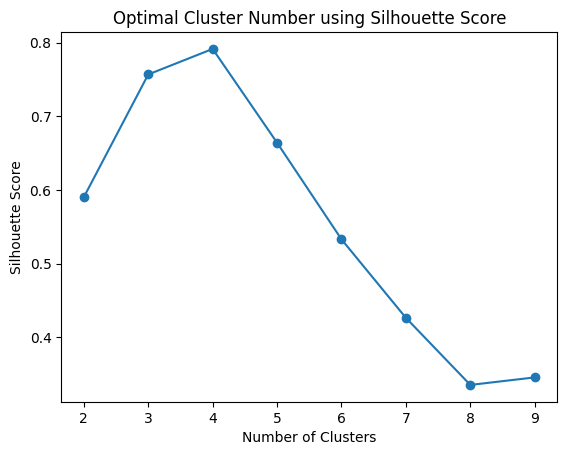

In [12]:
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Cluster Number using Silhouette Score')
plt.show()

실루엣 스코어 그래프를 보면 클러스터 개수가 4일 때 실루엣 스코어가 가장 크다. 이에 가장 적절한 클러스터 개수는 4개이다.

## 5-2. Elbow Method

In [13]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

### Elbow Method를 기준으로 보면, 'elbow point'는 몇 개의 클러스터를 선택해야 한다고 말하나요?

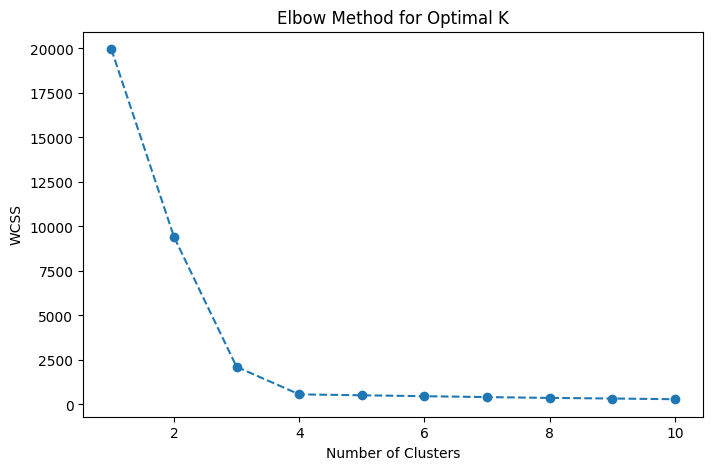

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

Elbow Method에 따르면 WCSS가 급격히 감소하다가 완만해지는 지점이다. 위의 그래프에 따르면 3 정도가 급격히 감소한 후에 완만해지는 위치라고 할 수 있다.

다만 4도 감소 후 급격한 완만해지는 포인트로 생각될 수 있다.

이에 데이터의 의미적인 해석이나 데이터의 실제적인 분포를 보고 보다 적절한 개수를 고르는 것이 좋겠다.